# Annex 1: High Dimensional Time-Series Analysis

## Data and Module Import

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
csv_path = Path("downloads/TEST_Trader_Quant_dataset.csv")
df = pd.read_csv(csv_path, low_memory=False)

In [3]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
0,74.23525,124.000,23.000,149.187,7.459,7.872,257.347,77.510,86.753,0,...,15582,6.8649,44,533,201481,85873,42474,237989,69445,33461
1,74.17525,33.105,280.280,133.749,0.709,31.305,87.454,51.044,130.774,2,...,13398,6.8589,45012,63355,230732,84898,45959,155027,45111,44533
2,74.18325,375.086,323.644,170.037,3.999,25.476,168.794,72.876,270.396,2,...,12777,6.8595,27710,55091,247450,98765,43705,206995,74398,42840
3,74.17625,48.775,25.853,93.927,39.872,14.148,72.699,65.654,352.091,0,...,14498,6.8595,32364,39759,237211,95343,35553,217658,75365,53509
4,74.17125,48.774,301.886,90.637,30.003,20.829,201.224,24.241,96.640,0,...,14704,6.8583,17667,52192,236698,102647,44195,196868,74185,19152


## Data Analysis and Insights

We start with obtaining statistical data for the columns including mean, correlation, standard deviation, and quantiles. Since we have a very large dataset of 56 columns, we will use a 56 by 56 correlation matrix to find correlations between each column with each other.

Instead of just using a matrix of numbers presenting correlation, we will use a heatmap. I believe this will be significant as instead of just reading a 56 x 56 matrix of numbers, which would be highly inefficient, a heatmap will allow for the strongest correlations to be clearly visible with a stronger colour.

In [4]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
count,8688.000000,8688.000000,8688.000000,8688.000000,8688.000000,8688.000000,8688.000000,8688.000000,8688.000000,8688.000000,...,8688.000000,8688.000000,8.688000e+03,8.688000e+03,8.688000e+03,8.688000e+03,8.688000e+03,8.688000e+03,8.688000e+03,8.688000e+03
mean,72.298593,781.216361,807.324287,106.064478,39.628097,68.509298,104.816129,41.243442,66.884973,0.991483,...,11968.761625,6.729406,7.399760e+04,7.789342e+04,1.468472e+05,5.464478e+04,2.795307e+04,1.617964e+05,5.874387e+04,2.963756e+04
std,3.600288,1137.844449,1262.210062,165.048474,81.746966,145.411195,179.093467,136.181540,160.093853,0.819314,...,8108.180968,0.346986,8.510458e+04,1.043728e+05,1.204487e+05,6.502605e+04,5.485431e+04,2.575737e+05,1.971361e+05,1.399805e+05
min,60.277750,0.127000,0.006000,0.402000,0.016000,0.020000,0.261000,0.020000,0.017000,0.000000,...,21.000000,5.365200,0.000000e+00,0.000000e+00,1.094000e+03,1.710000e+02,1.160000e+02,3.830000e+02,1.540000e+02,1.690000e+02
25%,71.519875,97.043750,100.329500,37.691000,10.568000,14.018250,39.941500,11.376750,15.238750,0.000000,...,4818.000000,6.501600,2.098800e+04,2.097700e+04,7.231575e+04,2.256450e+04,9.701500e+03,7.675975e+04,2.340250e+04,9.797750e+03
50%,73.713000,351.978000,344.176000,73.808500,24.075000,33.383000,77.003500,24.813500,34.808000,1.000000,...,12487.500000,6.861300,4.788550e+04,4.798100e+04,1.420225e+05,4.886250e+04,2.312200e+04,1.575080e+05,5.054250e+04,2.338850e+04
75%,74.201750,1003.126750,996.374500,126.193250,46.198750,77.282000,128.701000,46.603750,79.017000,2.000000,...,17371.000000,6.940500,9.617750e+04,9.739375e+04,1.931392e+05,7.180750e+04,3.624950e+04,2.137030e+05,7.199325e+04,3.594450e+04
max,78.947000,13359.016000,18239.051000,4426.142000,3255.730000,5841.050000,6291.834000,9612.751000,8422.520000,2.000000,...,181211.000000,7.433700,1.560098e+06,2.144818e+06,1.417569e+06,1.312172e+06,2.146799e+06,8.145469e+06,7.424314e+06,7.717164e+06


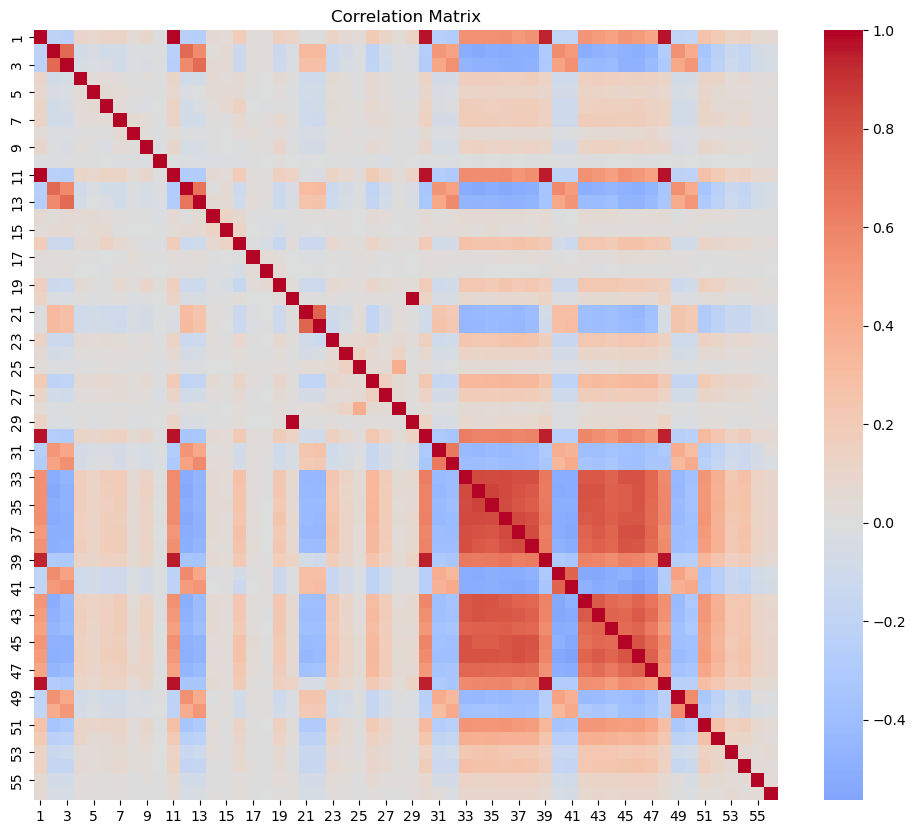

In [5]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Matrix") 
plt.show()

This heatmap is a great way to identify trends from a large dataset. From the heatmap, we can deduce that there are correlations between the columns, mostly dominated between columns 30 and 50. 

Moreover, it seems that columns 1, 11, 30, 39, and 48 all have strong positive correlations with each other, and 20 and 29 have a strong correlation. We can conclude which are the strongest trends by finding the strongest correlations, aswell as the weakest correlations, shown below:

In [6]:
corr_unstacked = corr.unstack().sort_values(ascending=False)
strong_corrs = corr_unstacked[(corr_unstacked < 1) & (abs(corr_unstacked) > 0.7)]
strong_corrs.head(20)

20  29    1.000000
29  20    1.000000
11  1     0.995385
1   11    0.995385
30  11    0.975031
11  30    0.975031
48  11    0.973088
11  48    0.973088
39  48    0.971967
48  39    0.971967
30  1     0.968214
1   30    0.968214
48  1     0.966122
1   48    0.966122
11  39    0.951786
39  11    0.951786
30  48    0.949627
48  30    0.949627
30  39    0.946272
39  30    0.946272
dtype: float64

In [7]:
corr_unstacked = corr.unstack().sort_values(ascending=True)
strong_corrs = corr_unstacked[(corr_unstacked < 0) & (abs(corr_unstacked) > -1)]
strong_corrs.head(20)

41  46   -0.563539
46  41   -0.563539
40  46   -0.545116
46  40   -0.545116
40  43   -0.544889
43  40   -0.544889
40  42   -0.536596
42  40   -0.536596
2   34   -0.536220
34  2    -0.536220
    12   -0.533986
12  34   -0.533986
37  41   -0.532178
41  37   -0.532178
45  41   -0.529529
41  45   -0.529529
12  36   -0.528411
36  12   -0.528411
34  40   -0.526076
40  34   -0.526076
dtype: float64

As expected for the positive correlation, 20 and 29, followed by pairings of 1, 11, 30, 39 and 48 have the strongest correlation. Meanwhile, 40, 41, 42, 43 and 46 pairings have some weak correlation.

## Visualisation of Trends

As it is clear that multiple columns have correlations with each other, I will use pairplots to visualise these trends, and single plots for individual columns with correlation

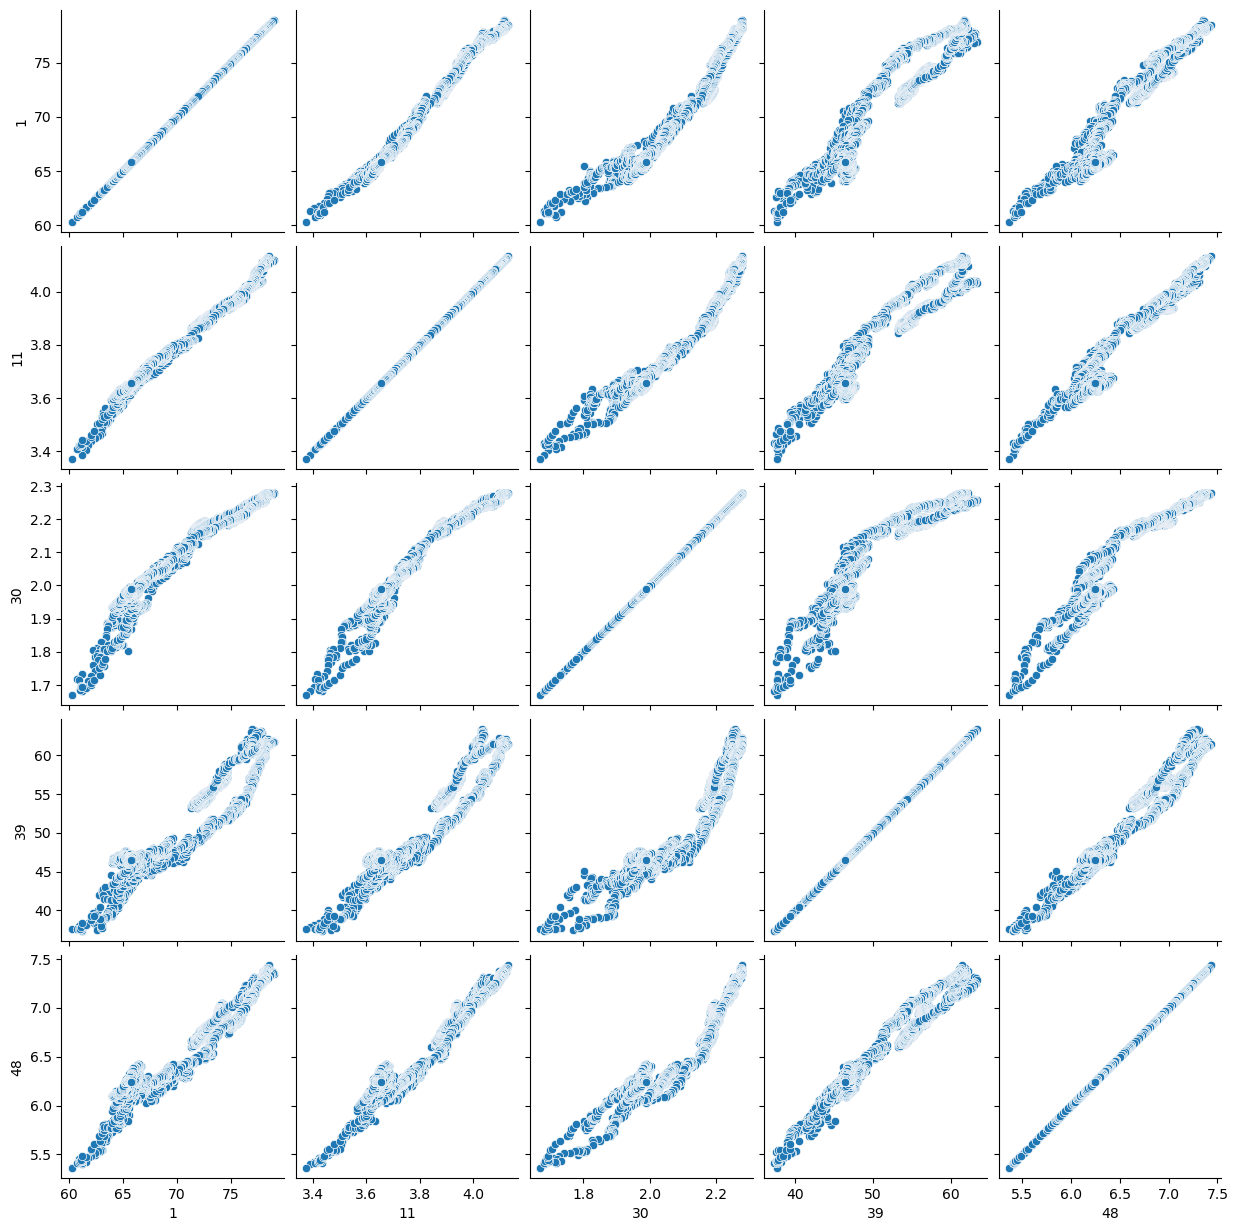

In [8]:
sns.pairplot(df[['1', '11', '30', '39','48']],diag_kind=None)

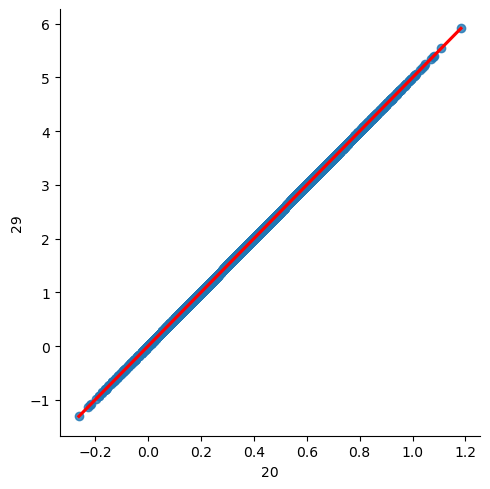

In [9]:
sns.lmplot(x='20', y='29', data=df, line_kws={"color": "red"})

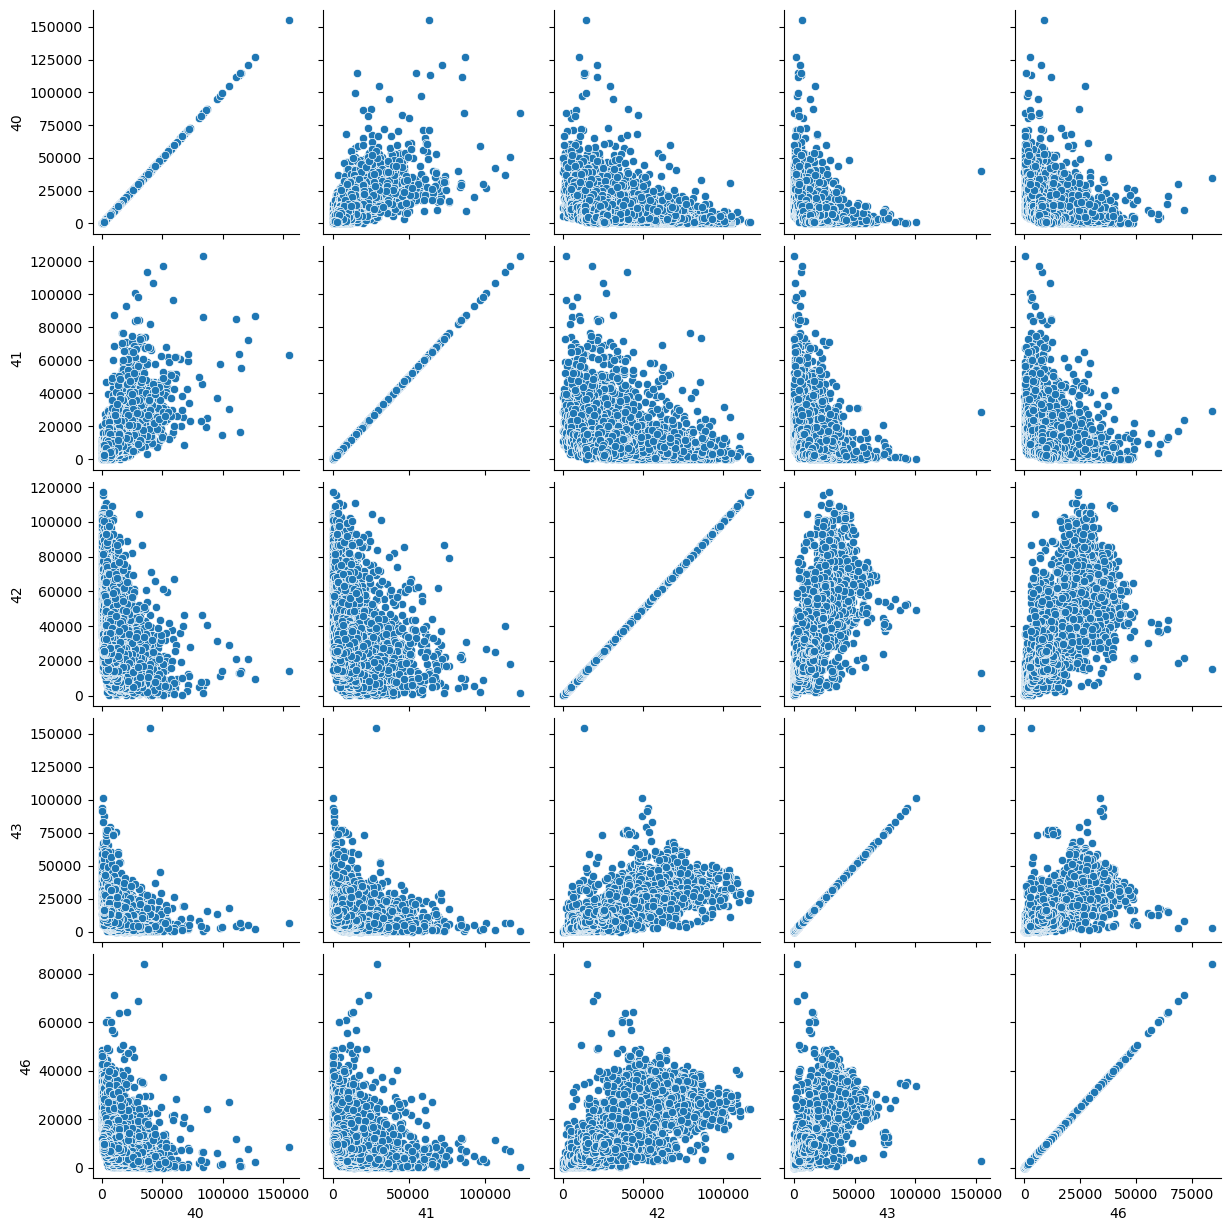

In [10]:
sns.pairplot(df[['40', '41', '42', '43','46']],diag_kind=None)

Although there is some weak correlation between some of the columns, there isn't a really strong negative correlation, as shown from the graphs. So although there is negative correlation there isn't enough to conclude an inverse trend between any of the columns.

## Conclusions

To conclude, there are strong positive correlations/trend between columns 20 and 29, as well as columns 1, 11, 30, 39 and 48. The strongest correlation between the columns is between 20 and 29 with a correlation of 1. The strongest negative correlation is between 41 and 46, but it isn't very strong, as it has a value of -0.56. 

Other noticeable correlations between columns consist of 2 and 3, 40 and 41, but not as strong.